In [4]:
#  라이브러리 로드 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 
train = pd.read_csv("./data/data/train.csv")

In [62]:
%matplotlib inline

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

# EDA & 데이터 전처리

- 데이터 확인 
- 기술통계 확인 
- 결측치 확인 & 처리
- 무한대 값, 중복된는 값 확인 & 처리 
- 이상치 확인 & 처리
- 변수간 상관관계 분석
- 데이터 스케일링
---

## 데이터 확인

    데이터 행 열 수 확인 
    df.shape

    데이터 컬럼명 확인
    df.columns

    데이터 컬럼별 정보 확인 (데이터 타입, non-null의 수)
    df.info()



In [5]:
# 데이터 확인 
print(train.shape)
print(train.columns)
print(train.info())

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<Axes: >

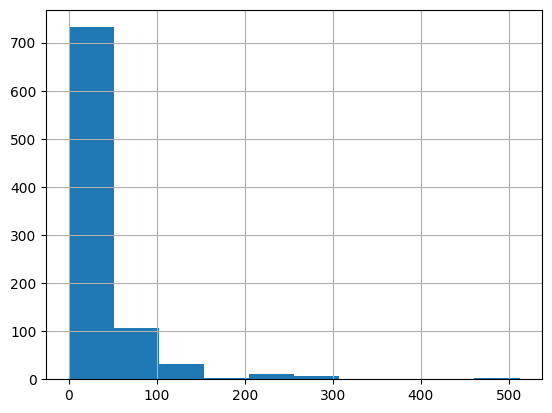

In [14]:
# 시각화를 통한 데이터 확인

train["Fare"].hist()

<Axes: >

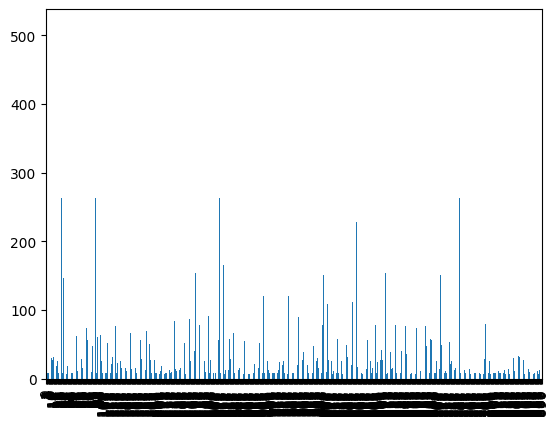

In [12]:
train["Fare"].plot(kind="bar")

<Axes: >

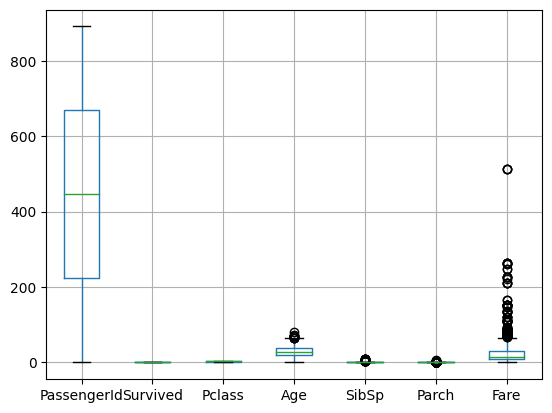

In [13]:
train.boxplot()

---
## 데이터의 기술 통계량 확인

    df.describe()

- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 

In [15]:
# 데이터 기술 통계량 확인
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# 문자열 데이터 확인
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
# 비율로 표시
train["Embarked"].value_counts(property)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

---
## 결측치 확인 & 처리

    전체 결측치 확인 
    df.isna().sum().sum()

    컬럼별 결측치 확인 
    df.isna().sum()

    결측치 데이터 데이터프레임 형식으로 보기
    df[df.isna().any(axis=1)]
    
    삭제
    df.dropna(axis = 0, inplace = True)
    
    대체(중앙값, 평균값, 최빈값)
    df.fillna("", inplace = True)

    최빈값
    from statistics import mode
    mode(df[col])

In [20]:
# 결측치 확인
# df.shape
train.shape

(891, 12)

In [21]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Index([61, 829], dtype='int64')

In [48]:
train.drop(index=train[train.isna().any(axis=1)].index, axis=0,inplace=True)

In [49]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
# 결측치 처리
#  df.shape
#  Age는 평균값 cabin는  최빈값으로 Embarked의 결측치는 삭제해봅시다! 
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [36]:
x = train['Cabin'].mode()
train['Cabin'] = train['Cabin'].fillna(x)

In [45]:
train['Embarked'] = train['Embarked'].dropna(axis=0)

In [46]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

---
## 무한대 값 확인 
df[df.isin(np.abs([np.inf])).any(axis=1)]

In [50]:
# 데이터 무한대값 확인
train[train.isin(np.abs([np.inf])).any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [51]:
# 무한대 값을 가지는 데이터 처리
# df.shape




,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [70]:
origin = train.copy()

--- 
## 이상치 확인 & 처리 

### IQR을 이용한 이상치 확인 & 처리


    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index

In [53]:
win = train.select_dtypes(exclude='object')

quantile_25 = np.percentile(win['Fare'].values, 25)
quantile_75 = np.percentile(win['Fare'].values, 75)

IQR = quantile_75 - quantile_25
IQR_weight = IQR*1.5

lowest = quantile_25 - IQR_weight
highest = quantile_75 + IQR_weight

outlier_idx = win['Fare'] [(win['Fare'] < lowest) | (win['Fare'] > highest) ].index

In [56]:
len(win)

889

In [58]:
win.drop(index=outlier_idx, axis=0, inplace=True)

In [59]:
len(win)

775

In [60]:
# 최소한으로 지우고 싶을 때 쓰는 방법
np.argmax(train['Fare'])

257

---
### 윈저라이징 (Winsorizing)
### 이상치를 제거하는 대신 이상치 값을 분포의 상/하한값으로 대체하는 방식

plt.boxplot(df[col])

    from scipy.stats.mstats  import winsorize
    winsorize(df[col],limits=[0.005, 0.005])

plt.boxplot(df[col])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dec0624400>,
 'caps': [<matplotlib.lines.Line2D at 0x1dec0624940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dec0624160>],
 'medians': [<matplotlib.lines.Line2D at 0x1dec0624e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dec0625120>],
 'means': []}

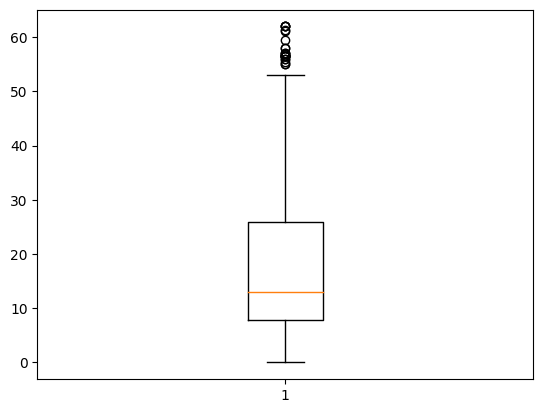

In [63]:
from scipy.stats.mstats import winsorize

win['Fare'] = winsorize(win['Fare'], limits=[0.005, 0.005])

plt.boxplot(win['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1debdb4c3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1debdb4c880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1debdacf2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1debdb4cdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1debdb4cfd0>],
 'means': []}

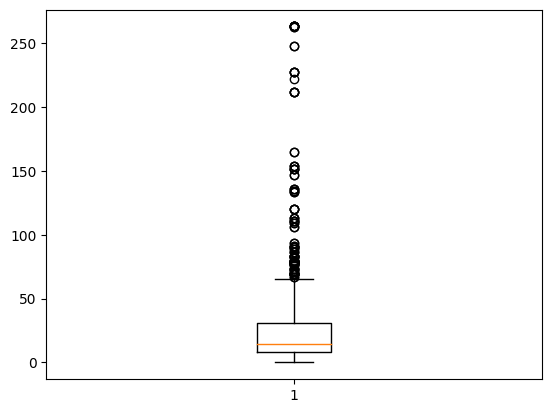

In [73]:
train['Fare'] = winsorize(train['Fare'], limits=[0.005, 0.005])

plt.boxplot(train['Fare'])

윈저라이징 하드코딩


In [ ]:
# 1.
quantile_5 = np.percentile(origin['Fare'].values, 0.5)
quantile__5 = np.percentile(origin['Fare'].values, 99.5)

origin[origin["Fare"]>quantile_5] = quantile_5
origin[origin["Fare"]<quantile__5] = quantile__5

{'whiskers': [<matplotlib.lines.Line2D at 0x1debdaf2080>,
 'caps': [<matplotlib.lines.Line2D at 0x1debdaf25c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1debdaf1f00>],
 'medians': [<matplotlib.lines.Line2D at 0x1debdaf2b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1debdaf2da0>],
 'means': []}

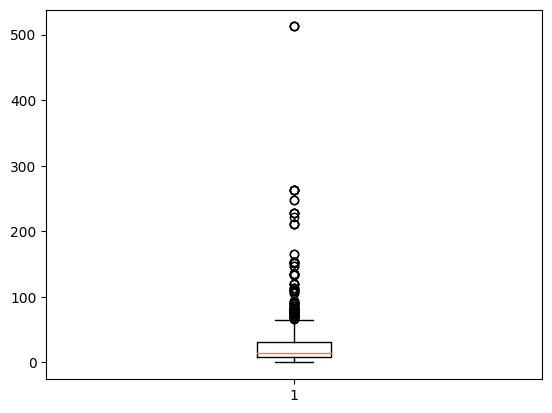

In [72]:
# 2.
origin = train.copy()
origin[origin['Fare']>quantile__5].replace(quantile__5)
origin[origin['Fare']<quantile_5].replace(quantile_5)

plt.boxplot(origin['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1debdb77850>,
 'caps': [<matplotlib.lines.Line2D at 0x1debdb77d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1debdb775b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1debdb9c310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1debdb9c5b0>],
 'means': []}

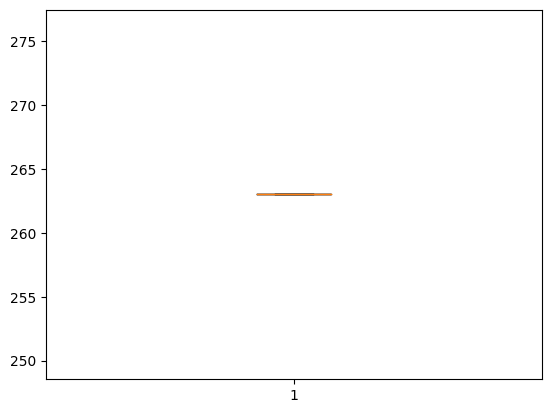

In [74]:
# 3.
quantile_5 = np.percentile(origin['Fare'].values, 0.5)
quantile__5 = np.percentile(origin['Fare'].values, 99.5)

for i in origin.index:
    if origin.loc[i, 'Fare'] > quantile__5 :
        origin.loc[i, 'Fare'] = quantile__5
    elif origin.loc[i, 'Fare'] < quantile__5 :
        origin.loc[i, 'Fare'] = quantile__5

plt.boxplot(origin['Fare'])

---
### isolation forest



![Untitled](https://github.com/juno-bara/Ubion_Hackathon/assets/124761676/91a51b10-6bd1-4b36-8b6f-5aa5e9b94c4a)



    from sklearn.ensemble import IsolationForest

    clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
    clf.fit(df)

    이상치가 아닌 값 추출해서 데이터프레임 
    sklearn에서는 predic를 한 결과는 이상치는 -1, 정상치는 1로 반환하여 리턴해줌
    isol_df = df[clf.predict(df) != -1]



---
### KMeans


    # KMeans 클러스터링을 이용해서 이상치 제거 (for문을 통해 n_clusters=13 도출)
    from sklearn.cluster import KMeans
    clf = KMeans(n_clusters=2, random_state=156)
    clf.fit(df)
    df[clf.predict(df)==0]

    # 군집화 평가를 위해 실루엣 계수 이용
    from sklearn.metrics import silhouette_score
    clf = KMeans(n_clusters=2, random_state=156)
    clf.fit(df_수치)
    df_km = df_수치[clf.predict(df_수치)==0]
    label = clf.labels_
    score_samples = silhouette_score(df_수치,label)
    print('silhouette:',score_samples)

In [93]:
# KMeans 클러스터링을 이용해서 이상치 제거 


In [92]:
# 군집화 평가를 위해 실루엣 계수 이용


---
## 데이터 상관관계 분석

    df.corr("pearson")
    df.corr("kendall")
    df.corr("spearman")


    colormap = plt.cm.PuBu
    upp_mat = np.triu(df.corr())
    plt.figure(figsize=(10, 10))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family="Malgun Gothic")
    plt.title("Correlation of Features", y=1.05, size=15)
    sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
                cmap=colormap, linecolor="white", annot=True, mask=upp_mat)


    from statsmodels.stats.outliers_influence import variance_inflation_factor
    VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns 

    VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    vif

In [ ]:
# 상관계수 확인

In [123]:
# 히트맵 확인

In [ ]:
# VIF 다중공선성 확인

---
## 스케일링

- `MinMaxScaler` : 데이터가 0과 1 사이에 위치하도록 스케일링
- `MaxAbsScaler` : 데이터가 -1과 1 사이에 위치하도록 스케일링
- `StandardScaler` : 데이터의 평균 = 0, 분산 = 1이 되도록 스케일링
- `RobustScaler` : 데이터의 중앙값 = 0, IQR = 1이 되도록 스케일

    from sklearn.preprocessing import StandardScaler

    변형 객체 생성
    std_scaler = StandardScaler()

    훈련데이터의 모수 분포 저장
    std_scaler.fit(X_train)

    훈련 데이터 스케일링
    X_train_scaled = std_scaler.transform(X_train)

    테스트 데이터의 스케일링
    X_test_scaled = std_scaler.transform(X_test)

     스케일링 된 결과 값을 본래 값으로 되돌리.
     X_origin = std_scaler.inverse_transform(X_train_scaled)